In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
new_header = []
def change_titels(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header
    display(df.head())
    
change_titels(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Get the numerical variables from our dataset.

In [4]:
data_num = data.select_dtypes(include=np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

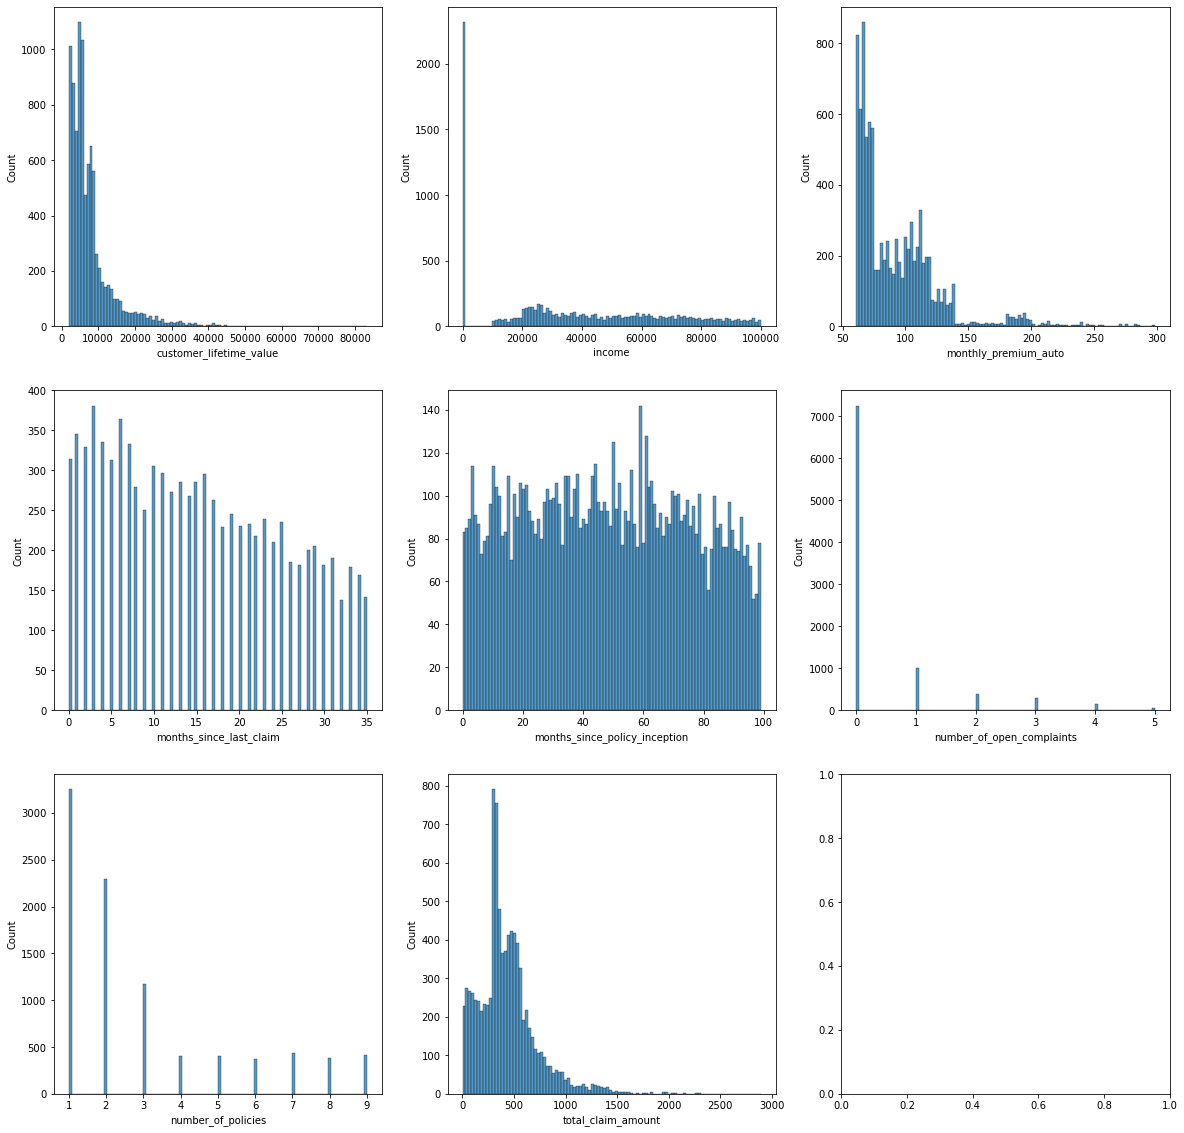

In [5]:
fig, ax1 = plt.subplots(3,3,figsize=(20,20)) 
sns.histplot(x ="customer_lifetime_value",data = data_num ,bins = 100, ax = ax1[0,0])
sns.histplot(x ="income",data = data_num ,bins = 100, ax = ax1[0,1])
sns.histplot(x ="monthly_premium_auto",data = data_num ,bins = 100, ax = ax1[0,2])
sns.histplot(x ="months_since_last_claim",data = data_num ,bins = 100, ax = ax1[1,0])
sns.histplot(x ="months_since_policy_inception",data = data_num ,bins = 100, ax = ax1[1,1])
sns.histplot(x ="number_of_open_complaints",data = data_num ,bins = 100, ax = ax1[1,2])
sns.histplot(x ="number_of_policies",data = data_num ,bins = 100, ax = ax1[2,0])
sns.histplot(x ="total_claim_amount",data = data_num ,bins = 100, ax = ax1[2,1])

Number of Policies and Number of Open Complains and Months Since Last Claim are discrete values. 

Customer Lifetime Value, Income, Monthly Premium Auto, Total Claim Amount need to be tranformed. 

np.log(x)
data_num_log = list(map(np.log, data_num['customer_lifetime_value'])
data_num_log
#sns.histplot(x ='customer_lifetime_value',data = data_num_log ,bins = 100, ax = ax1[0,0])
#plt.show()

In [6]:
#LOG TRANSFORMATION
data_num2 = data_num.copy()
for col in ['customer_lifetime_value','monthly_premium_auto','total_claim_amount']:
    data_num2[col+"_log"] = np.log(data_num[col])

In [7]:
data_num2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log,monthly_premium_auto_log,total_claim_amount_log
0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,4.234107,5.952753
1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,4.543295,7.031268
2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,4.682131,6.339428
3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,4.663439,6.272653
4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,4.290459,4.928202


<AxesSubplot:xlabel='total_claim_amount_log', ylabel='Count'>

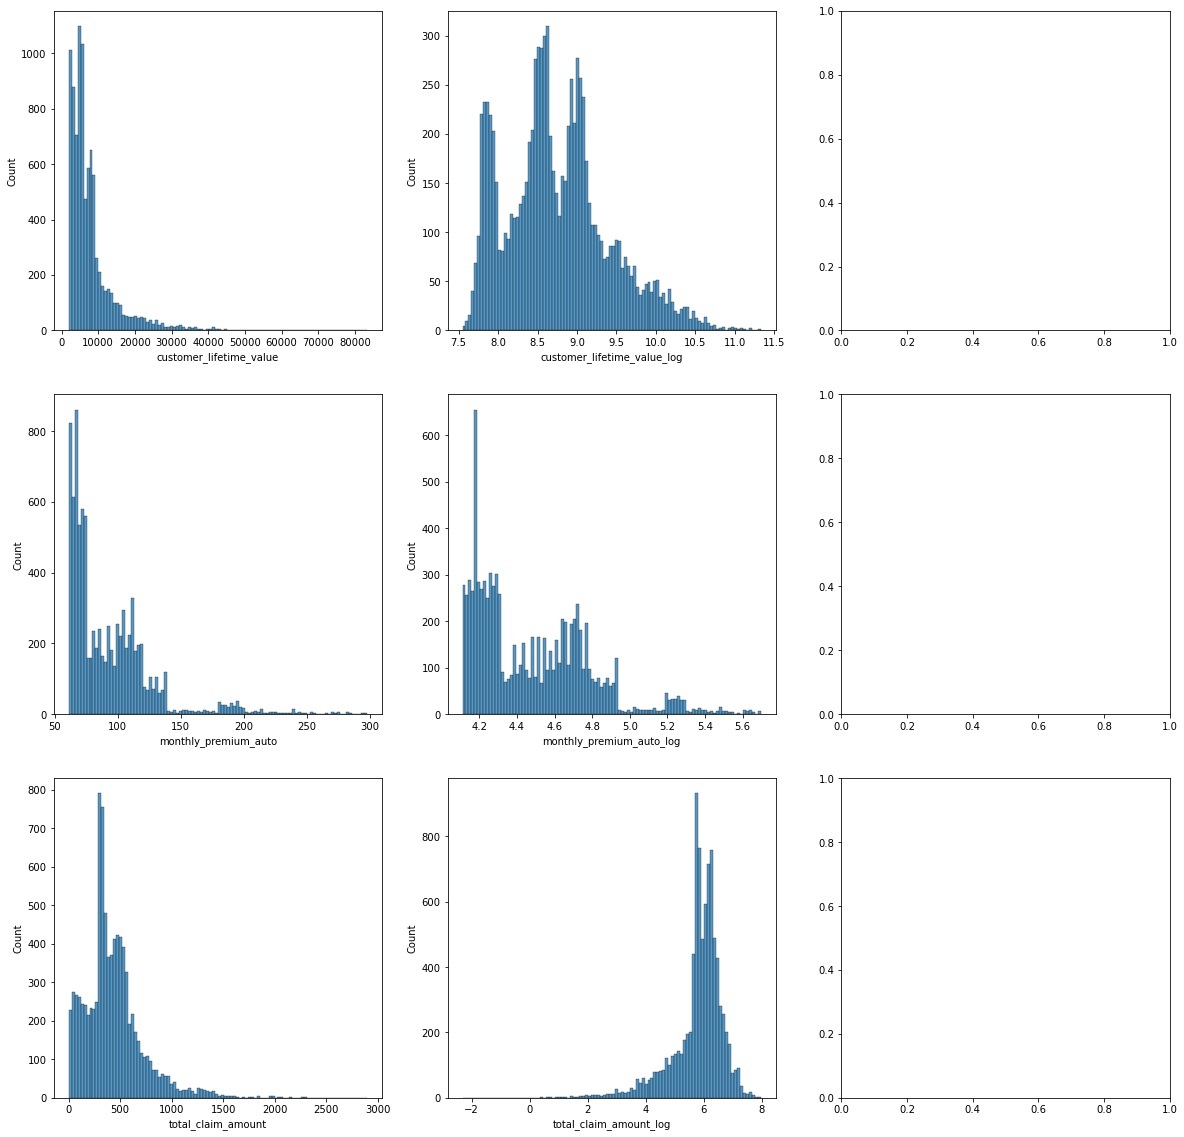

In [8]:
#compare
fig, ax1 = plt.subplots(3,3,figsize=(20,20)) 
sns.histplot(x ="customer_lifetime_value",data = data_num ,bins = 100, ax = ax1[0,0])
sns.histplot(x ="customer_lifetime_value_log",data = data_num2 ,bins = 100, ax = ax1[0,1])
sns.histplot(x ="monthly_premium_auto",data = data_num ,bins = 100, ax = ax1[1,0])
sns.histplot(x ="monthly_premium_auto_log",data = data_num2 ,bins = 100, ax = ax1[1,1])
sns.histplot(x ="total_claim_amount",data = data_num ,bins = 100, ax = ax1[2,0])
sns.histplot(x ="total_claim_amount_log",data = data_num2 ,bins = 100, ax = ax1[2,1])

Transform income with LOG tranformation after dropping the 0s

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_24253/1479625079.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


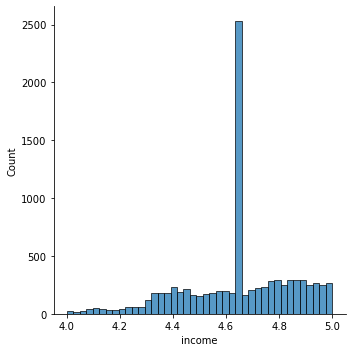

In [9]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

data_num2['income'] = list(map(log_transfom_clean2,data_num2['income']))

#Now we replace the NAN by the mean

data_num2['income'] = data_num2['income'].fillna(np.mean(data_num2['income']))
sns.displot(data_num2['income'])
plt.show()

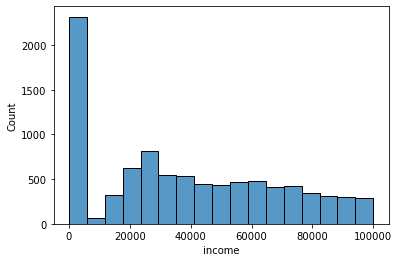

In [10]:
sns.histplot(x ="income",data = data_num)
plt.show()


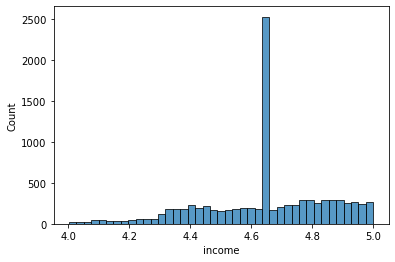

In [11]:
sns.histplot(x ="income",data = data_num2)
plt.show()

In [12]:
data_num2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log,monthly_premium_auto_log,total_claim_amount_log
0,2763.519279,4.750308,69,32,5,0,1,384.811147,7.924260,4.234107,5.952753
1,6979.535903,4.644445,94,13,42,0,8,1131.464935,8.850738,4.543295,7.031268
2,12887.431650,4.688126,108,18,38,0,2,566.472247,9.464008,4.682131,6.339428
3,7645.861827,4.644445,106,18,65,0,7,529.881344,8.941920,4.663439,6.272653
4,2813.692575,4.641831,73,12,44,0,1,138.130879,7.942253,4.290459,4.928202


In [13]:
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


# LAB Feature extraction

In [14]:
data_cat = data.select_dtypes(np.object)
data_cat.head()
#data_cat.info()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_24253/1594223834.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_cat = data.select_dtypes(np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
data_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Plot all the categorical variables with the proper plot. What can you see?

<AxesSubplot:xlabel='policy', ylabel='count'>

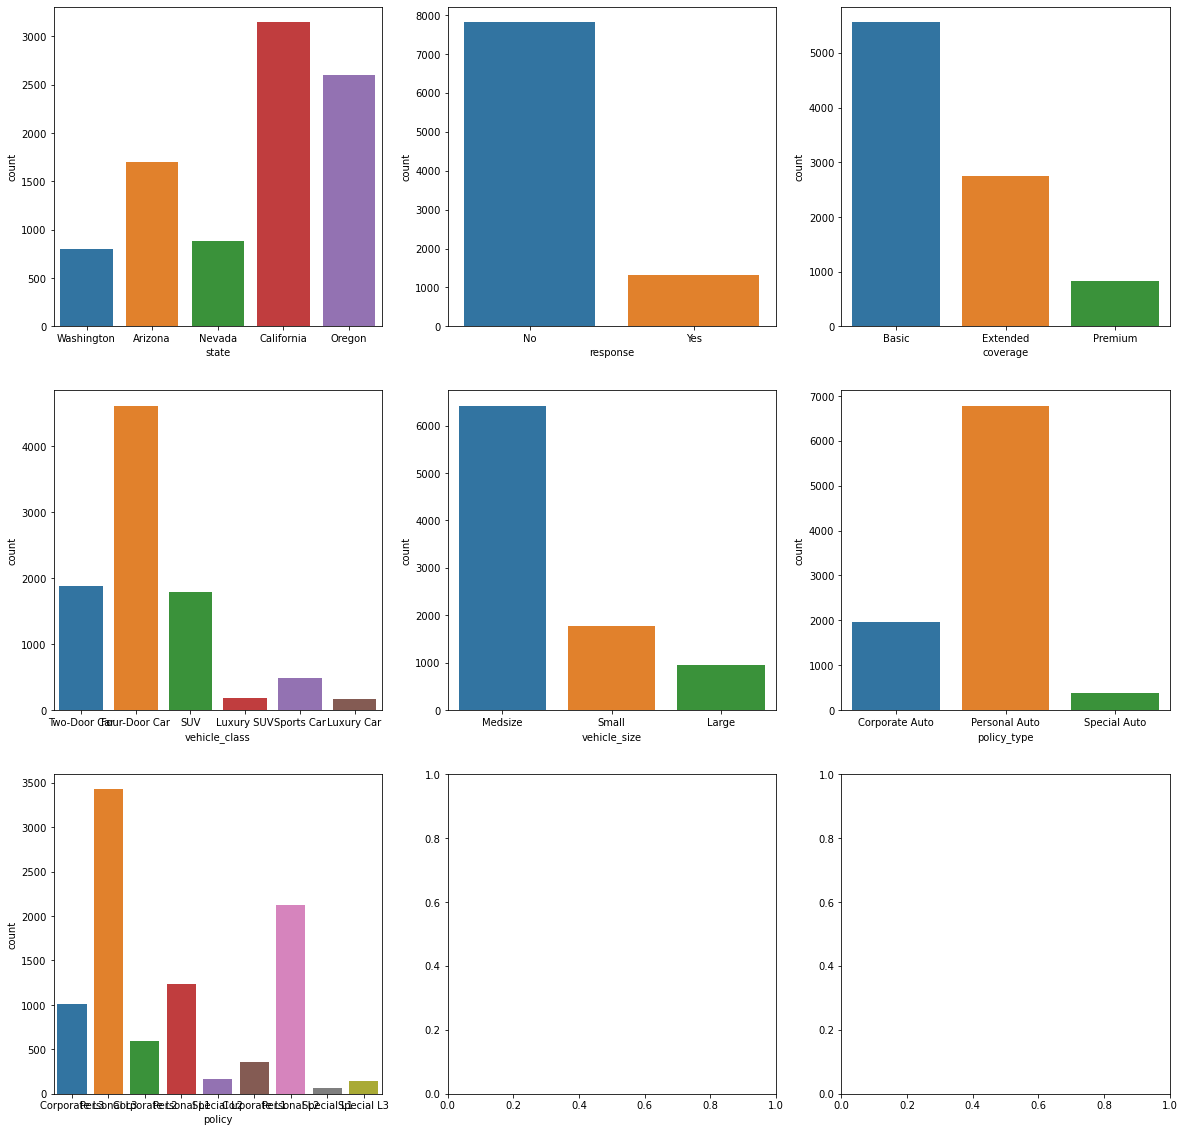

In [16]:
fig, ax1 = plt.subplots(3,3,figsize=(20,20)) 
sns.countplot(x='state',data=data_cat, ax = ax1[0,0])
sns.countplot(x='response',data=data_cat, ax = ax1[0,1])
sns.countplot(x='coverage',data=data_cat, ax = ax1[0,2])
sns.countplot(x='vehicle_class',data=data_cat, ax = ax1[1,0])
sns.countplot(x='vehicle_size',data=data_cat, ax = ax1[1,1])
sns.countplot(x='policy_type',data=data_cat, ax = ax1[1,2])
sns.countplot(x='policy',data=data_cat, ax = ax1[2,0])

<AxesSubplot:xlabel='vehicle_class', ylabel='Count'>

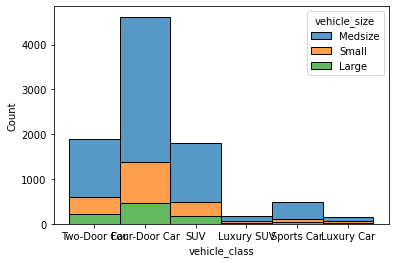

In [17]:
sns.histplot(binwidth=0.5, x="vehicle_class", hue="vehicle_size", data=data_cat, stat="count", multiple="stack")

<AxesSubplot:xlabel='policy_type', ylabel='Count'>

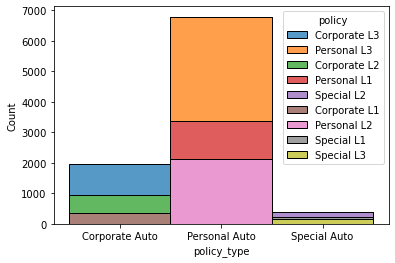

In [18]:
sns.histplot(binwidth=0.5, x="policy_type", hue="policy", data=data_cat, stat="count", multiple="stack")

There are some redundand info like policy and policy type.

In [19]:
data_cat[['policy_type', 'policy']].head()

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3
2,Personal Auto,Personal L3
3,Corporate Auto,Corporate L2
4,Personal Auto,Personal L1


Plot time variable. Can you extract something from it?

In [20]:
def policy_clean(text):
    return text.replace("Personal L", '').replace('Corporate L' , '').replace('Special L' , '')

In [21]:
data_cat1 = data_cat.copy()
data_cat1['policy'] = data_cat1['policy'].apply(policy_clean)
    
data_cat1.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
data_cat1['policy'] = data_cat1['policy'].astype('int')
data_cat1.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy                int64
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

Plot time variable. Can you extract something from it?

In [23]:
data_cat['effective_to_date']=pd.to_datetime(data_cat['effective_to_date'])
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           9134 non-null   object        
 1   state              9134 non-null   object        
 2   response           9134 non-null   object        
 3   coverage           9134 non-null   object        
 4   education          9134 non-null   object        
 5   effective_to_date  9134 non-null   datetime64[ns]
 6   employmentstatus   9134 non-null   object        
 7   gender             9134 non-null   object        
 8   location_code      9134 non-null   object        
 9   marital_status     9134 non-null   object        
 10  policy_type        9134 non-null   object        
 11  policy             9134 non-null   object        
 12  renew_offer_type   9134 non-null   object        
 13  sales_channel      9134 non-null   object        
 14  vehicle_

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_24253/3546472781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['effective_to_date']=pd.to_datetime(data_cat['effective_to_date'])


In [24]:
data_cat['month'] = data_cat['effective_to_date'].dt.month
data_cat['day'] = data_cat['effective_to_date'].dt.weekday

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_24253/3967233083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['month'] = data_cat['effective_to_date'].dt.month
/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_24253/3967233083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['day'] = data_cat['effective_to_date'].dt.weekday


In [25]:
data_cat['day']

0       3
1       0
2       5
3       3
4       3
       ..
9129    3
9130    5
9131    6
9132    3
9133    0
Name: day, Length: 9134, dtype: int64

In [26]:
data_cat['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

<AxesSubplot:xlabel='day', ylabel='Count'>

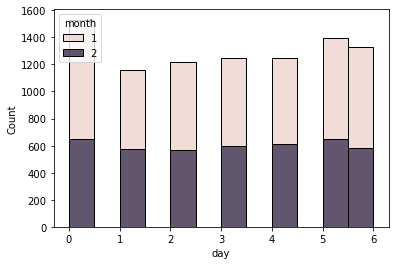

In [27]:
sns.histplot(binwidth=0.5, x="day", hue="month", data=data_cat, stat="count", multiple="stack")

There are only two months that are reported, January and February. 